In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pyreadstat

import scipy.stats as stats
import seaborn as sns
%matplotlib inline

from sklearn import linear_model
import statsmodels.api as sm

from sklearn.model_selection import StratifiedShuffleSplit

In [2]:
ca_housing = pd.read_csv('housing_ca.csv')
ca_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


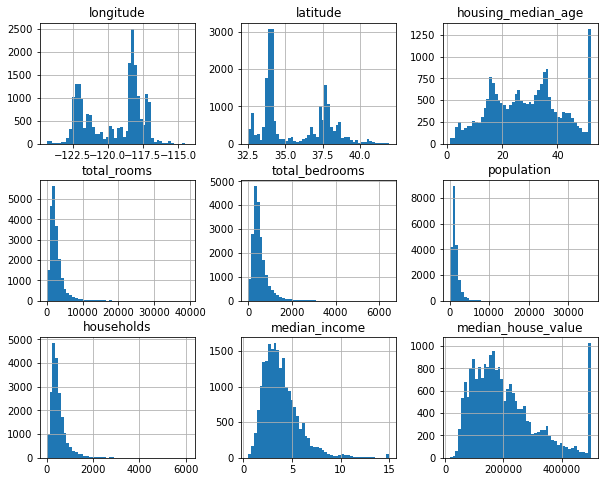

In [3]:
ca_housing.hist(bins=50, figsize=(10, 8))
plt.show()

In [4]:
ca_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [5]:
ca_housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(ca_housing, test_size=0.2, random_state=42)

In [7]:
ca_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


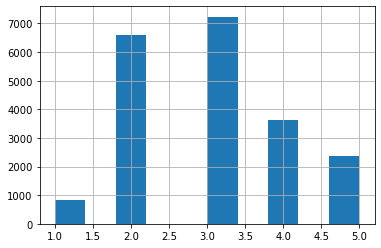

In [8]:
ca_housing['income_cat'] = pd.cut(ca_housing['median_income'], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])
ca_housing['income_cat'].hist()
plt.show()

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(ca_housing, ca_housing["income_cat"]):
    strat_train_set = ca_housing.loc[train_index]
    strat_test_set = ca_housing.loc[test_index]
print(strat_test_set['income_cat'].value_counts() / len(strat_test_set))

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64


In [10]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)
ca_housing = strat_train_set.copy()

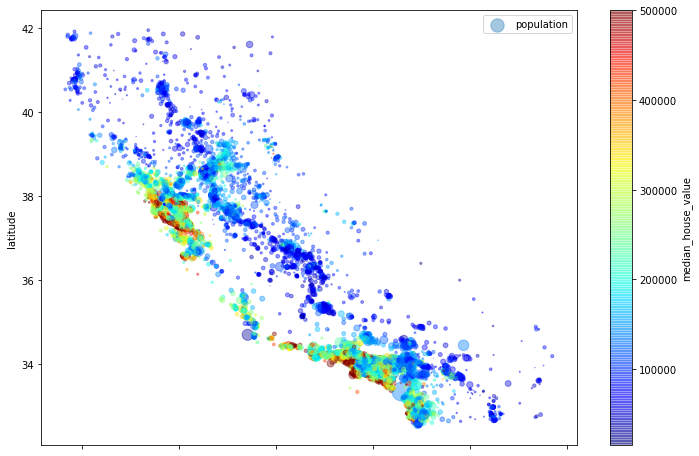

In [11]:
ca_housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, s=ca_housing['population']/100, label='population',
figsize=(12, 8), c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()
plt.show()

In [12]:
ca_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38,1568,351.0,710,339,2.7042,286600,<1H OCEAN
18632,-121.93,37.05,14,679,108.0,306,113,6.4214,340600,<1H OCEAN
14650,-117.20,32.77,31,1952,471.0,936,462,2.8621,196900,NEAR OCEAN
3230,-119.61,36.31,25,1847,371.0,1460,353,1.8839,46300,INLAND
3555,-118.59,34.23,17,6592,1525.0,4459,1463,3.0347,254500,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46,1271,236.0,573,210,4.9312,240200,INLAND
12053,-117.56,33.88,40,1196,294.0,1052,258,2.0682,113000,INLAND
13908,-116.40,34.09,9,4855,872.0,2098,765,3.2723,97800,INLAND
11159,-118.01,33.82,31,1960,380.0,1356,356,4.0625,225900,<1H OCEAN


In [13]:
corr_matrix = ca_housing.corr()
print(corr_matrix.median_house_value.sort_values(ascending=False))

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64


In [14]:
# add rooms per household, bedrooms per household, pop per household
ca_housing["rooms_per_household"] = ca_housing["total_rooms"]/ca_housing["households"]
ca_housing["bedrooms_per_room"] = ca_housing["total_bedrooms"]/ca_housing["total_rooms"]
ca_housing["population_per_household"] = ca_housing["population"]/ca_housing["households"]

corr_matrix = ca_housing.corr()
print(corr_matrix["median_house_value"].sort_values(ascending=False))

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64


<AxesSubplot:>

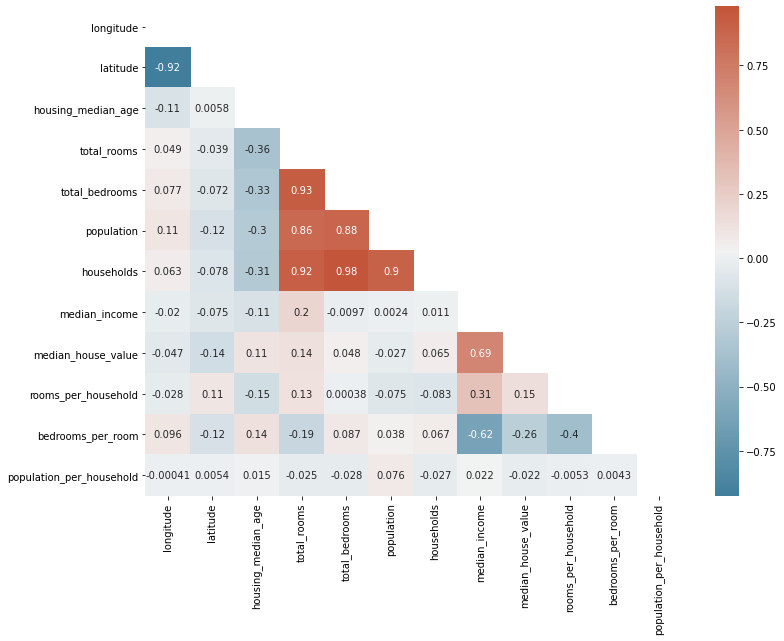

In [15]:
#here is a code for  # Correlation Matrix Heatmap:
corrmat = ca_housing.corr()
f, ax = plt.subplots(figsize=(12, 9))
mask = np.triu(np.ones_like(corrmat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corrmat, annot=True, mask = mask, cmap=cmap)

In [16]:
Y = ca_housing['median_house_value']

In [17]:
# Data Preparation
ca_housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

median = ca_housing["total_bedrooms"].median()
ca_housing["total_bedrooms"].fillna(median, inplace=True)

housing_num = ca_housing.drop("ocean_proximity", axis=1)


In [18]:
from sklearn.base import BaseEstimator, TransformerMixin

In [19]:
# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

In [20]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [21]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [22]:
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [23]:
from sklearn.compose import ColumnTransformer

In [24]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])
housing_prepared = full_pipeline.fit_transform(ca_housing)

In [25]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

data = ca_housing.iloc[:]
labels = housing_labels.iloc[:]
data_preparation = full_pipeline.transform(data)
print("Predictions: ", lin_reg.predict(data_preparation))


Predictions:  [210644.60459286 317768.80697211 210956.43331178 ...  95464.57062437
 214353.22541713 276426.4692067 ]


In [26]:
data_preparation_df = pd.DataFrame(lin_reg.predict(data_preparation))

In [27]:
pd.options.display.float_format = '{:,.2f}'.format
data_preparation_df = data_preparation_df.rename(columns={0:"Home_Value"})

In [28]:
data_preparation_df

,Home_Value
0,"210,644.60"
1,"317,768.81"
2,"210,956.43"
3,"59,218.99"
4,"189,747.56"
...,...
16507,"233,454.87"
16508,"99,588.02"
16509,"95,464.57"
16510,"214,353.23"


In [29]:
import pyreadstat

import scipy.stats as stats
import seaborn as sns
%matplotlib inline

from sklearn import linear_model
import statsmodels.api as sm
print(ca_housing)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                  38         1568          351.00   
18632    -121.93     37.05                  14          679          108.00   
14650    -117.20     32.77                  31         1952          471.00   
3230     -119.61     36.31                  25         1847          371.00   
3555     -118.59     34.23                  17         6592        1,525.00   
...          ...       ...                 ...          ...             ...   
6563     -118.13     34.20                  46         1271          236.00   
12053    -117.56     33.88                  40         1196          294.00   
13908    -116.40     34.09                   9         4855          872.00   
11159    -118.01     33.82                  31         1960          380.00   
15775    -122.45     37.77                  52         3095          682.00   

       population  households  median_income ocean_

In [30]:
# add rooms per household, bedrooms per household, pop per household
ca_housing["rooms_per_household"] = ca_housing["total_rooms"]/ca_housing["households"]
ca_housing["bedrooms_per_room"] = ca_housing["total_bedrooms"]/ca_housing["total_rooms"]
ca_housing["population_per_household"] = ca_housing["population"]/ca_housing["households"]
ca_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38,1568,351.00,710,339,2.70,<1H OCEAN,4.63,0.22,2.09
18632,-121.93,37.05,14,679,108.00,306,113,6.42,<1H OCEAN,6.01,0.16,2.71
14650,-117.20,32.77,31,1952,471.00,936,462,2.86,NEAR OCEAN,4.23,0.24,2.03
3230,-119.61,36.31,25,1847,371.00,1460,353,1.88,INLAND,5.23,0.20,4.14
3555,-118.59,34.23,17,6592,"1,525.00",4459,1463,3.03,<1H OCEAN,4.51,0.23,3.05
...,...,...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46,1271,236.00,573,210,4.93,INLAND,6.05,0.19,2.73
12053,-117.56,33.88,40,1196,294.00,1052,258,2.07,INLAND,4.64,0.25,4.08
13908,-116.40,34.09,9,4855,872.00,2098,765,3.27,INLAND,6.35,0.18,2.74
11159,-118.01,33.82,31,1960,380.00,1356,356,4.06,<1H OCEAN,5.51,0.19,3.81


In [31]:
X = ca_housing[['housing_median_age','rooms_per_household','population','median_income']]

In [32]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 -7076.7892714604095
Coefficients: 
 [ 1.79770841e+03 -2.15206517e+03  2.70564438e+00  4.39737785e+04]
                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     4329.
Date:                Fri, 01 Oct 2021   Prob (F-statistic):               0.00
Time:                        20:46:30   Log-Likelihood:            -2.1002e+05
No. Observations:               16512   AIC:                         4.200e+05
Df Residuals:                   16507   BIC:                         4.201e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
-------

In [33]:
df = pd.get_dummies(ca_housing, columns=['ocean_proximity'])

In [34]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
17606,-121.89,37.29,38,1568,351.00,710,339,2.70,4.63,0.22,2.09,1,0,0,0,0
18632,-121.93,37.05,14,679,108.00,306,113,6.42,6.01,0.16,2.71,1,0,0,0,0
14650,-117.20,32.77,31,1952,471.00,936,462,2.86,4.23,0.24,2.03,0,0,0,0,1
3230,-119.61,36.31,25,1847,371.00,1460,353,1.88,5.23,0.20,4.14,0,1,0,0,0
3555,-118.59,34.23,17,6592,"1,525.00",4459,1463,3.03,4.51,0.23,3.05,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46,1271,236.00,573,210,4.93,6.05,0.19,2.73,0,1,0,0,0
12053,-117.56,33.88,40,1196,294.00,1052,258,2.07,4.64,0.25,4.08,0,1,0,0,0
13908,-116.40,34.09,9,4855,872.00,2098,765,3.27,6.35,0.18,2.74,0,1,0,0,0
11159,-118.01,33.82,31,1960,380.00,1356,356,4.06,5.51,0.19,3.81,1,0,0,0,0


In [36]:
df['age_sq'] = df['housing_median_age']*df['housing_median_age']
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,age_sq
17606,-121.89,37.29,38,1568,351.00,710,339,2.70,4.63,0.22,2.09,1,0,0,0,0,1444
18632,-121.93,37.05,14,679,108.00,306,113,6.42,6.01,0.16,2.71,1,0,0,0,0,196
14650,-117.20,32.77,31,1952,471.00,936,462,2.86,4.23,0.24,2.03,0,0,0,0,1,961
3230,-119.61,36.31,25,1847,371.00,1460,353,1.88,5.23,0.20,4.14,0,1,0,0,0,625
3555,-118.59,34.23,17,6592,"1,525.00",4459,1463,3.03,4.51,0.23,3.05,1,0,0,0,0,289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46,1271,236.00,573,210,4.93,6.05,0.19,2.73,0,1,0,0,0,2116
12053,-117.56,33.88,40,1196,294.00,1052,258,2.07,4.64,0.25,4.08,0,1,0,0,0,1600
13908,-116.40,34.09,9,4855,872.00,2098,765,3.27,6.35,0.18,2.74,0,1,0,0,0,81
11159,-118.01,33.82,31,1960,380.00,1356,356,4.06,5.51,0.19,3.81,1,0,0,0,0,961


In [37]:
X = df[['housing_median_age','rooms_per_household','median_income','ocean_proximity_INLAND',
                'ocean_proximity_ISLAND','ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN','age_sq']]

In [38]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 70252.3027605848
Coefficients: 
 [-7.02879423e+02  5.83767799e+02  3.76647731e+04 -7.38971540e+04
  1.53084629e+05  8.94940284e+03  1.61602120e+04  2.87858851e+01]
                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     3061.
Date:                Fri, 01 Oct 2021   Prob (F-statistic):               0.00
Time:                        21:03:47   Log-Likelihood:            -2.0843e+05
No. Observations:               16512   AIC:                         4.169e+05
Df Residuals:                   16503   BIC:                         4.169e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 

In [39]:
column = df["households"]
max_value = column.min()

print(max_value)

2


<AxesSubplot:>

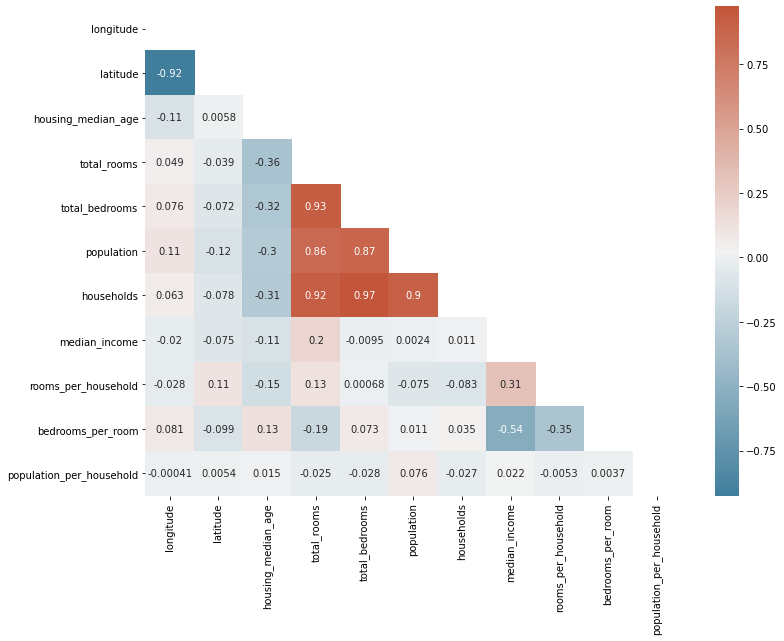

In [40]:
#here is a code for  # Correlation Matrix Heatmap:
corrmat = ca_housing.corr()
f, ax = plt.subplots(figsize=(12, 9))
mask = np.triu(np.ones_like(corrmat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corrmat, annot=True, mask = mask, cmap=cmap)

In [6]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

XGBoostError: XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed (vcomp140.dll or libgomp-1.dll for Windows, libomp.dylib for Mac OSX, libgomp.so for Linux and other UNIX-like OSes). Mac OSX users: Run `brew install libomp` to install OpenMP runtime.
  * You are running 32-bit Python on a 64-bit OS
Error message(s): ['dlopen(/Users/matt.rentner/opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Users/matt.rentner/opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']


In [7]:
# Cross-validation with k-folds
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [8]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
model_xgb = xgb.XGBRegressor(colsample_bytree=0.2, gamma=0.0, 
                             learning_rate=0.05, max_depth=6, 
                             min_child_weight=1.5, n_estimators=7200,
                             reg_alpha=0.9, reg_lambda=0.6,
                             subsample=0.2,seed=42, silent=1,
                             random_state =7)
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)


NameError: name 'xgb' is not defined